In [24]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

from imblearn.over_sampling import SMOTE

%matplotlib inline

## Load the MIMIC data

In [2]:
df = pd.read_csv('../data/UCI_train_test.csv')
df.drop(columns='Unnamed: 0',inplace=True)
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,insulin,glyburide-metformin,change,diabetesMed,readmitted,tolbutamide,tolazamide,number_features_medications,diabetesMed_change,label
0,2278392,8222157,Caucasian,0,5,Unknown,unknown,referral,0.693147,41,...,No,No,No,No,NO,No,No,0,NoNo,0
1,28236,89869032,AfricanAmerican,0,45,Emergency,home,emergency_room,2.302585,47,...,Steady,No,No,Yes,>30,No,No,1,YesNo,0
2,590346,37746639,AfricanAmerican,0,45,Emergency,home_care,emergency_room,2.197225,55,...,Steady,No,No,Yes,>30,No,No,1,YesNo,0
3,630342,93232917,AfricanAmerican,0,55,Elective,home_care,referral,2.302585,37,...,Steady,No,No,Yes,>30,No,No,1,YesNo,0
4,676422,63754317,AfricanAmerican,0,75,Emergency,home,emergency_room,1.609438,48,...,Steady,No,No,Yes,>30,No,No,1,YesNo,0


In [3]:
df.shape

(5547, 37)

In [4]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'glimepiride', 'glipizide',
       'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'insulin',
       'glyburide-metformin', 'change', 'diabetesMed', 'readmitted',
       'tolbutamide', 'tolazamide', 'number_features_medications',
       'diabetesMed_change', 'label'],
      dtype='object')

In [5]:
categorical_columns =['race', 'gender', 
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'change', 'diabetesMed',
       'tolbutamide', 'tolazamide', 'diabetesMed_change']
numerical_columns = ['age', 'time_in_hospital', 'num_lab_procedures', 'num_procedures','num_medications',
                     'number_outpatient', 'number_emergency','number_inpatient', 'number_diagnoses',
                    'number_features_medications','max_glu_serum', 'A1Cresult',]


In [98]:
X = df[numerical_columns]

In [99]:
X.shape

(5547, 12)

In [100]:
y = df['label']
y.shape

(5547,)

## Prepare Balanced Data for Machine Learning

In [101]:
# The base line for this dataset
base = df['label'].value_counts(normalize=True)
print(f'The base line is\n{base}')

The base line is
0    0.907518
1    0.092482
Name: label, dtype: float64


In [102]:
# Split the train and test data

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state = 42)

In [103]:
print(X_train.shape,X_test.shape)

(4160, 12) (1387, 12)


In [104]:
y_train.value_counts()

0    3779
1     381
Name: label, dtype: int64

In [105]:
y_test.value_counts()

0    1255
1     132
Name: label, dtype: int64

In [106]:
y_train.value_counts(normalize=True)

0    0.908413
1    0.091587
Name: label, dtype: float64

In [107]:
y_test.value_counts(normalize=True)

0    0.904831
1    0.095169
Name: label, dtype: float64

In [108]:
# Banlance the train set with SMOTE
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)
print(X_train_sm.shape, y_train_sm.shape)
y_train_sm.value_counts(normalize=True)

(7558, 12) (7558,)


1    0.5
0    0.5
Name: label, dtype: float64

In [109]:
# Banlance the train set with SMOTE

X_test_sm, y_test_sm = sm.fit_sample(X_test, y_test)
print(X_test_sm.shape, y_test_sm.shape)
y_test_sm.value_counts(normalize=True)

(2510, 12) (2510,)


1    0.5
0    0.5
Name: label, dtype: float64

## Machine Learning Classification Models: Logistic Regression

In [18]:
model_lg = LogisticRegression()
model_lg.fit(X_train_sm, y_train_sm)

/Users/susanchen/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
#cross_val_acc, train_acc, test_acc, sensitivity, specificity, precision, tp, fp 

In [60]:
model_lg = LogisticRegression()
cross_val_acc, train_acc, test_acc, sensitivity, specificity, precision, tp, fp = model_work(model_lg, 
                                                                                             X_train_tfidf,
                                                                                             y_train,
                                                                                             X_test_tfidf,
                                                                                             y_test)

/Users/susanchen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in long_scalars
  # This is added back by InteractiveShellApp.init_path()


In [67]:
cross_val_acc, train_acc, test_acc, sensitivity, specificity, precision, tp, fp

(0.9177, 0.9255, 0.9229, 0.0, 0.990728476821192, 0.0, 0, 14)

## Machine Learning Classification Models: Random Forest

In [ ]:
# The unbalanced train and test test didn't work
# Try the balanced train set and didn't balanced test set

In [35]:
# Model work on imbalanced dataset
model_rf1 = RandomForestClassifier(n_estimators=50, max_depth=2)
model_rf1.fit(X_train, y_train)
cross_val_acc1 = round(cross_val_score(model_rf1, X_train, y_train).mean(),4)
train_acc1 = round(model_rf1.score(X_train,y_train),4)
test_acc1 = round(model_rf1.score(X_test,y_test),4)
preds1 = model_rf1.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, preds1).ravel()
print(f' cross_val_acc = {cross_val_acc1}\n train_acc = {train_acc1} \n test_acc = {test_acc1}\n tn, fp, fn, tp {tn, fp, fn, tp}' )

 cross_val_acc = 0.9084
 train_acc = 0.9084 
 test_acc = 0.9048
 tn, fp, fn, tp (1255, 0, 132, 0)


In [39]:
feature_importance_tup = sorted(zip(map(lambda x: round(x, 4), model_rf1.feature_importances_), numerical_columns), reverse=True)
feature_importance_tup[:30]

[(0.3056, 'number_inpatient'),
 (0.2465, 'num_medications'),
 (0.1474, 'time_in_hospital'),
 (0.0832, 'number_diagnoses'),
 (0.0648, 'num_procedures'),
 (0.0473, 'A1Cresult'),
 (0.0372, 'num_lab_procedures'),
 (0.029, 'number_emergency'),
 (0.0188, 'age'),
 (0.0101, 'max_glu_serum'),
 (0.0088, 'number_features_medications'),
 (0.0015, 'number_outpatient')]

In [ ]:
# Try the balanced train set and balanced test set

In [52]:
model_rf2 = RandomForestClassifier(n_estimators=50, max_depth=2)
model_rf2.fit(X_train_sm, y_train_sm)
cross_val_acc2 = round(cross_val_score(model_rf2, X_train_sm, y_train_sm).mean(),4)
train_acc2 = round(model_rf2.score(X_train_sm,y_train_sm),4)
test_acc2 = round(model_rf2.score(X_test_sm,y_test_sm),4)
preds2 = model_rf2.predict(X_test_sm)
tn, fp, fn, tp = confusion_matrix(y_test_sm, preds2).ravel()
print(f' cross_val_acc = {cross_val_acc2}\n train_acc = {train_acc2} \n test_acc = {test_acc2}\n tn, fp, fn, tp {tn, fp, fn, tp}' )

 cross_val_acc = 0.6944
 train_acc = 0.6975 
 test_acc = 0.6705
 tn, fp, fn, tp (707, 548, 279, 976)


In [40]:
feature_importance_tup = sorted(zip(map(lambda x: round(x, 4), model_rf2.feature_importances_), numerical_columns), reverse=True)
feature_importance_tup[:30]

[(0.3473, 'A1Cresult'),
 (0.2347, 'num_medications'),
 (0.1732, 'time_in_hospital'),
 (0.1127, 'number_diagnoses'),
 (0.0644, 'number_features_medications'),
 (0.0259, 'age'),
 (0.0177, 'num_lab_procedures'),
 (0.0117, 'max_glu_serum'),
 (0.0092, 'number_inpatient'),
 (0.0022, 'number_outpatient'),
 (0.001, 'num_procedures'),
 (0.0, 'number_emergency')]

## Machine Learning Classification Models: Multinomial Naive Bayes

In [65]:
# Model work on imbalanced dataset
model_nb1 = MultinomialNB()
model_nb1.fit(X_train,y_train)
cross_val_acc3 = round(cross_val_score(model_nb1, X_train, y_train).mean(),4)
train_acc3 = round(model_nb1.score(X_train,y_train),4)
test_acc3 = round(model_nb1.score(X_test,y_test),4)
preds3 = model_nb1.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, preds3).ravel()
print(f' cross_val_acc = {cross_val_acc3}\n train_acc = {train_acc3} \n test_acc = {test_acc3}\n tn, fp, fn, tp {tn, fp, fn, tp}' )

 cross_val_acc = 0.8887
 train_acc = 0.8911 
 test_acc = 0.8832
 tn, fp, fn, tp (1212, 43, 119, 13)


In [66]:
# Model work on balanced dataset
model_nb2 = MultinomialNB()
model_nb2.fit(X_train_sm,y_train_sm)
cross_val_acc4 = round(cross_val_score(model_nb2, X_train_sm, y_train_sm).mean(),4)
train_acc4 = round(model_nb2.score(X_train_sm,y_train_sm),4)
test_acc4 = round(model_nb2.score(X_test_sm,y_test_sm),4)
preds4 = model_nb2.predict(X_test_sm)
tn, fp, fn, tp = confusion_matrix(y_test_sm, preds4).ravel()
print(f' cross_val_acc = {cross_val_acc4}\n train_acc = {train_acc4} \n test_acc = {test_acc4}\n tn, fp, fn, tp {tn, fp, fn, tp}' )

 cross_val_acc = 0.6044
 train_acc = 0.6044 
 test_acc = 0.6032
 tn, fp, fn, tp (647, 608, 388, 867)


## Machine Learning Classification Models: XG Boost

In [79]:
# Model work on imbalanced data
model_xg1 = XGBClassifier()
model_xg1.fit(X_train, y_train)
cross_val_acc5 = round(cross_val_score(model_xg1, X_train, y_train).mean(),4)
train_acc5 = round(model_xg1.score(X_train,y_train),4)
test_acc5 = round(model_xg1.score(X_test,y_test),4)
preds5 = model_xg1.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, preds5).ravel()
print(f' cross_val_acc = {cross_val_acc5}\n train_acc = {train_acc5} \n test_acc = {test_acc5}\n tn, fp, fn, tp {tn, fp, fn, tp}' )

 cross_val_acc = 0.907
 train_acc = 0.9111 
 test_acc = 0.9048
 tn, fp, fn, tp (1254, 1, 131, 1)


In [110]:
# Model work on balanced dataset
model_xg2 = XGBClassifier()
model_xg2.fit(X_train_sm, y_train_sm)
cross_val_acc6 = round(cross_val_score(model_xg2, X_train_sm, y_train_sm).mean(),4)
train_acc6 = round(model_xg2.score(X_train_sm,y_train_sm),4)
test_acc6 = round(model_xg2.score(X_test_sm,y_test_sm),4)
preds6 = model_xg2.predict(X_test_sm)
tn, fp, fn, tp = confusion_matrix(y_test_sm, preds6).ravel()
print(f' cross_val_acc = {cross_val_acc6}\n train_acc = {train_acc6} \n test_acc = {test_acc6}\n tn, fp, fn, tp {tn, fp, fn, tp}' )

 cross_val_acc = 0.8792
 train_acc = 0.8907 
 test_acc = 0.8689
 tn, fp, fn, tp (1132, 123, 206, 1049)


In [111]:
feature_importance_xg = sorted(zip(map(lambda x: round(x, 4), model_xg2.feature_importances_), numerical_columns), reverse=True)
feature_importance_xg[:15]

[(0.3109, 'A1Cresult'),
 (0.1795, 'time_in_hospital'),
 (0.0886, 'number_features_medications'),
 (0.0809, 'number_diagnoses'),
 (0.0803, 'num_medications'),
 (0.0802, 'max_glu_serum'),
 (0.0596, 'number_outpatient'),
 (0.032, 'number_inpatient'),
 (0.0289, 'age'),
 (0.026, 'num_procedures'),
 (0.0205, 'num_lab_procedures'),
 (0.0128, 'number_emergency')]

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


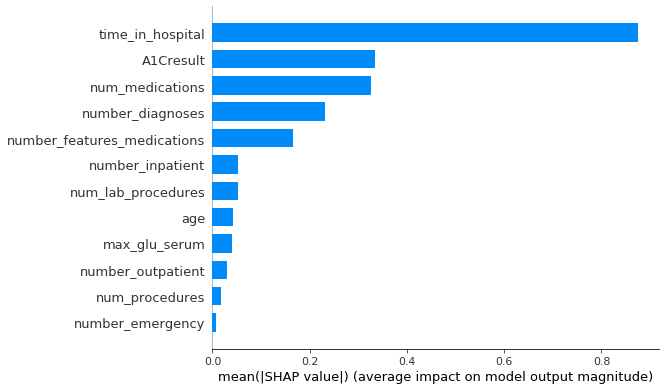

In [112]:
import shap
shap_values = shap.TreeExplainer(model_xg2).shap_values(X_train_sm)
shap.summary_plot(shap_values, X_train_sm, plot_type="bar", feature_names=numerical_columns)

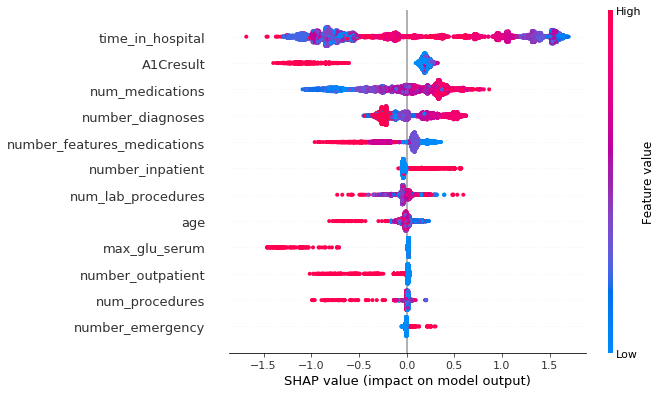

In [113]:
shap.summary_plot(shap_values, X_train_sm,feature_names=numerical_columns)

## Machine Learning Classification Models: SVM

In [95]:
# Model work on imbalanced dataset
model_svc1 =SVC(C = 0.1)
model_svc1.fit(X_train, y_train)
cross_val_acc7 = round(cross_val_score(model_svc1, X_train, y_train).mean(),4)
train_acc7 = round(model_svc1.score(X_train,y_train),4)
test_acc7 = round(model_svc1.score(X_test,y_test),4)
preds7 = model_svc1.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, preds7).ravel()
print(f' cross_val_acc = {cross_val_acc7}\n train_acc = {train_acc7} \n test_acc = {test_acc7}\n tn, fp, fn, tp {tn, fp, fn, tp}' )

 cross_val_acc = 0.9084
 train_acc = 0.9084 
 test_acc = 0.9048
 tn, fp, fn, tp (1255, 0, 132, 0)


In [97]:
# Model wrok on balanced train set and test set
model_svc2 =SVC(C = 0.1)
model_svc2.fit(X_train_sm, y_train_sm)
cross_val_acc8 = round(cross_val_score(model_svc2, X_train_sm, y_train_sm).mean(),4)
train_acc8 = round(model_svc2.score(X_train_sm,y_train_sm),4)
test_acc8 = round(model_svc2.score(X_test_sm,y_test_sm),4)
preds8 = model_svc2.predict(X_test_sm)
tn, fp, fn, tp = confusion_matrix(y_test_sm, preds8).ravel()
print(f' cross_val_acc = {cross_val_acc8}\n train_acc = {train_acc8} \n test_acc = {test_acc8}\n tn, fp, fn, tp {tn, fp, fn, tp}' )

 cross_val_acc = 0.5462
 train_acc = 0.547 
 test_acc = 0.5618
 tn, fp, fn, tp (565, 690, 410, 845)


## Machine Learning Classification Models: FFNN(feed forward neutral network)

In [41]:
n_input = X_train.shape[1]
n_input

12

In [44]:
model_ffnn = Sequential()

lam=0.09
model_ffnn.add(Dense(n_input,
                   input_dim = n_input,
                   activation = 'relu',
                   kernel_regularizer = regularizers.l2(lam)
                       ))
model_dropout = Sequential()
model_dropout.add(Dropout(0.5))
model_ffnn.add(Dense(1,
                   activation='sigmoid'))

model_ffnn.compile(loss='binary_crossentropy',
                 optimizer='adam',
                 metrics=['acc'])
early_stop = EarlyStopping(monitor = 'val_loss', 
                           min_delta=0, 
                           patience=5,
                           mode='auto')
history_all = model_ffnn.fit(X_train_sm,
                          y_train_sm,
                          validation_data=(X_test_sm,y_test_sm),
                          epochs=10,
                          batch_size=None,
                          verbose=2,
                          callbacks=[early_stop]
                          )

Train on 7558 samples, validate on 2510 samples
Epoch 1/10
 - 1s - loss: 4.4277 - acc: 0.5292 - val_loss: 1.1123 - val_acc: 0.5283
Epoch 2/10
 - 1s - loss: 0.9662 - acc: 0.5721 - val_loss: 0.8796 - val_acc: 0.5606
Epoch 3/10
 - 0s - loss: 0.8392 - acc: 0.5864 - val_loss: 0.8150 - val_acc: 0.6179
Epoch 4/10
 - 0s - loss: 0.7983 - acc: 0.6000 - val_loss: 0.7906 - val_acc: 0.6096
Epoch 5/10
 - 0s - loss: 0.7760 - acc: 0.6017 - val_loss: 0.7728 - val_acc: 0.6124
Epoch 6/10
 - 1s - loss: 0.7602 - acc: 0.6147 - val_loss: 0.7722 - val_acc: 0.5805
Epoch 7/10
 - 0s - loss: 0.7508 - acc: 0.6185 - val_loss: 0.7522 - val_acc: 0.6167
Epoch 8/10
 - 0s - loss: 0.7456 - acc: 0.6092 - val_loss: 0.7449 - val_acc: 0.6151
Epoch 9/10
 - 1s - loss: 0.7379 - acc: 0.6163 - val_loss: 0.7473 - val_acc: 0.5996
Epoch 10/10
 - 0s - loss: 0.7282 - acc: 0.6203 - val_loss: 0.7374 - val_acc: 0.6056


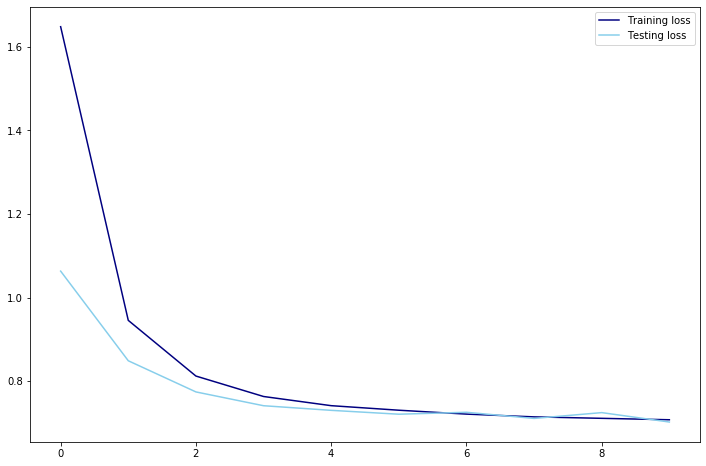

In [54]:
train_loss_all = history_all.history['loss']
test_loss_all = history_all.history['val_loss']
plt.figure(figsize=(12, 8))
plt.plot(train_loss_all, label='Training loss', color='navy')
plt.plot(test_loss_all, label='Testing loss', color='skyblue')
plt.legend();

In [43]:
# Results for imbalanced data
history_all.history['acc'][-1], history_all.history['val_acc'][-1]

(0.90841347, 0.9048305749893188)

In [45]:
# Results for balanced data
history_all.history['acc'][-1], history_all.history['val_acc'][-1]

(0.6202699, 0.6055777072906494)